# RANSAC Pyhton Implementation For Finding Road Lane
Based on thw work of https://salzis.wordpress.com/2014/06/10/robust-linear-model-estimation-using-ransac-python-implementation/

RANSAC or “RANdom SAmple Consensus” is an iterative method to estimate parameters of a mathematical model from a set of observed data which contains outliers. It is one of classical techniques in computer vision. 

In [8]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
import sys
%matplotlib inline
 
# Ransac parameters
ransac_iterations = 20  # number of iterations
ransac_threshold = 3    # threshold
ransac_ratio = 0.6      # ratio of inliers required to assert
                        # that a model fits well to data
 
# generate sparse input data
n_samples = 500               # number of input points
outliers_ratio = 0.4          # ratio of outliers
 
n_inputs = 1
n_outputs = 1
 
# generate samples
x = 30*np.random.random((n_samples,n_inputs) )
 
# generate line's slope (called here perfect fit)
perfect_fit = 0.5*np.random.normal(size=(n_inputs,n_outputs) )
 
# compute output
y = scipy.dot(x,perfect_fit)

In [9]:
# add a little gaussian noise
x_noise = x + np.random.normal(size=x.shape)
y_noise = y + np.random.normal(size=y.shape)
 
# add some outliers to the point-set
n_outliers = outliers_ratio*n_samples
indices = np.arange(x_noise.shape[0])
np.random.shuffle(indices)
outlier_indices = indices[:n_outliers]
 
x_noise[outlier_indices] = 30*np.random.random(size=(n_outliers,n_inputs))
 
# gaussian outliers
y_noise[outlier_indices] = 30*np.random.normal(size=(n_outliers,n_outputs))
 
# non-gaussian outliers (only on one side)
#y_noise[outlier_indices] = 30*(np.random.normal(size=(n_outliers,n_outputs))**2)

C:\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [10]:
def find_line_model(points):
    """ find a line model for the given points
    :param points selected points for model fitting
    :return line model
    """
 
    # [WARNING] vertical and horizontal lines should be treated differently
    #           here we just add some noise to avoid division by zero
 
    # find a line model for these points
    m = (points[1,1] - points[0,1]) / (points[1,0] - points[0,0] + sys.float_info.epsilon)  # slope (gradient) of the line
    c = points[1,1] - m * points[1,0]                                     # y-intercept of the line
 
    return m, c

In [11]:
def find_intercept_point(m, c, x0, y0):
    """ find an intercept point of the line model with
        a normal from point (x0,y0) to it
    :param m slope of the line model
    :param c y-intercept of the line model
    :param x0 point's x coordinate
    :param y0 point's y coordinate
    :return intercept point
    """
 
    # intersection point with the model
    x = (x0 + m*y0 - m*c)/(1 + m**2)
    y = (m*x0 + (m**2)*y0 - (m**2)*c)/(1 + m**2) + c
 
    return x, y

In [17]:
def ransac_plot(n, x, y, m, c, final=False, x_in=(), y_in=(), points=()):
    """ plot the current RANSAC step
    :param n      iteration
    :param points picked up points for modeling
    :param x      samples x
    :param y      samples y
    :param m      slope of the line model
    :param c      shift of the line model
    :param x_in   inliers x
    :param y_in   inliers y
    """
 
    fname = "output/figure_" + str(n) + ".png"
    line_width = 1.
    line_color = '#0080ff'
    title = 'iteration ' + str(n)
 
    if final:
        fname = "output/final.png"
        line_width = 3.
        line_color = '#ff0000'
        title = 'final solution'
 
    plt.figure("Ransac", figsize=(15., 15.))
 
    # grid for the plot
    grid = [min(x) - 10, max(x) + 10, min(y) - 20, max(y) + 20]
    plt.axis(grid)
 
    # put grid on the plot
    plt.grid(b=True, which='major', color='0.75', linestyle='--')
    #plt.xticks([i for i in range(min(x) - 10, max(x) + 10, 5)])
    #plt.yticks([i for i in range(min(y) - 20, max(y) + 20, 10)])
 
    # plot input points
    plt.plot(x[:,0], y[:,0], marker='o', label='Input points', color='#00cc00', linestyle='None', alpha=0.4)
 
    # draw the current model
    plt.plot(x, m*x + c, 'r', label='Line model', color=line_color, linewidth=line_width)
 
    # draw inliers
    if not final:
        plt.plot(x_in, y_in, marker='o', label='Inliers', linestyle='None', color='#ff0000', alpha=0.6)
 
    # draw points picked up for the modeling
    if not final:
        plt.plot(points[:,0], points[:,1], marker='o', label='Picked points', color='#0000cc', linestyle='None', alpha=0.6)
 
    plt.title(title)
    plt.legend()
    #plt.savefig(fname)
    #plt.close()

  inlier ratio =  0.6
  model_m =  0.34860175679
  model_c =  -0.40970496121
  inlier ratio =  0.596
  model_m =  0.34860175679
  model_c =  -0.40970496121
  inlier ratio =  0.606
  model_m =  0.359996117295
  model_c =  1.40746396907
The model is found !

Final model:

  ratio =  0.606
  model_m =  0.359996117295
  model_c =  1.40746396907


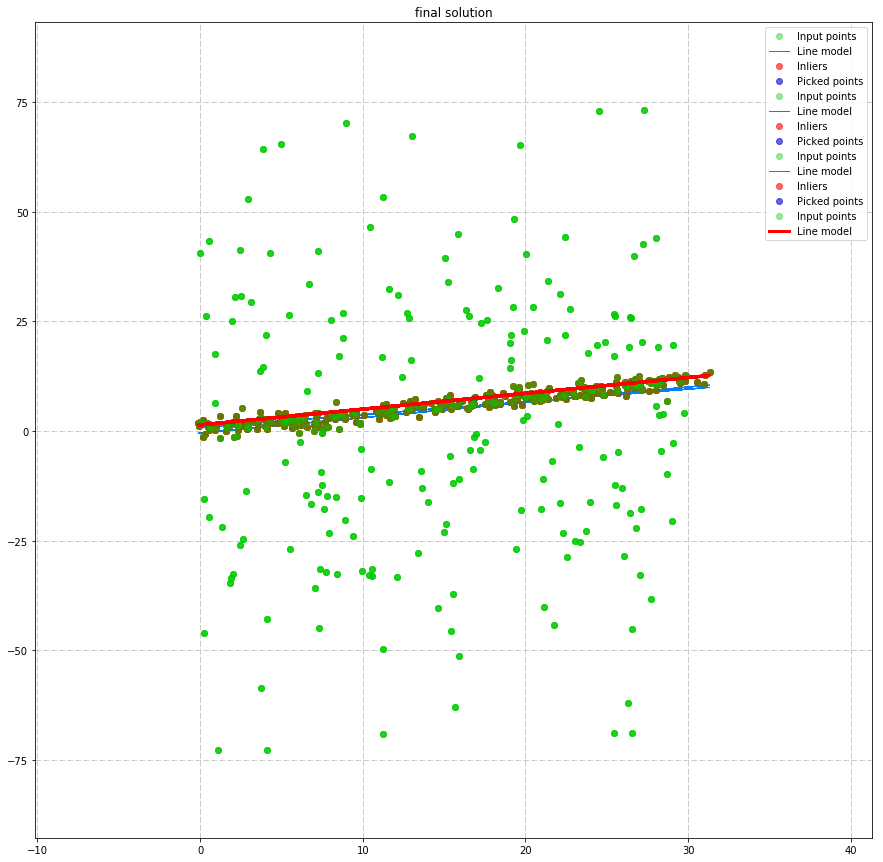

In [18]:
data = np.hstack( (x_noise,y_noise) )
 
ratio = 0.
model_m = 0.
model_c = 0.
 
# perform RANSAC iterations
for it in range(ransac_iterations):
 
    # pick up two random points
    n = 2
 
    all_indices = np.arange(x_noise.shape[0])
    np.random.shuffle(all_indices)
 
    indices_1 = all_indices[:n]
    indices_2 = all_indices[n:]
 
    maybe_points = data[indices_1,:]
    test_points = data[indices_2,:]
 
    # find a line model for these points
    m, c = find_line_model(maybe_points)
 
    x_list = []
    y_list = []
    num = 0
 
    # find orthogonal lines to the model for all testing points
    for ind in range(test_points.shape[0]):
 
        x0 = test_points[ind,0]
        y0 = test_points[ind,1]
 
        # find an intercept point of the model with a normal from point (x0,y0)
        x1, y1 = find_intercept_point(m, c, x0, y0)
 
        # distance from point to the model
        dist = math.sqrt((x1 - x0)**2 + (y1 - y0)**2)
 
        # check whether it's an inlier or not
        if dist < ransac_threshold:
            x_list.append(x0)
            y_list.append(y0)
            num += 1
 
    x_inliers = np.array(x_list)
    y_inliers = np.array(y_list)
 
    # in case a new model is better - cache it
    if num/float(n_samples) > ratio:
        ratio = num/float(n_samples)
        model_m = m
        model_c = c
 
    print ('  inlier ratio = ', num/float(n_samples))
    print ('  model_m = ', model_m)
    print ('  model_c = ', model_c)
 
    # plot the current step
    ransac_plot(it, x_noise,y_noise, m, c, False, x_inliers, y_inliers, maybe_points)
 
    # we are done in case we have enough inliers
    if num > n_samples*ransac_ratio:
        print ('The model is found !')
        break
 
# plot the final model
ransac_plot(0, x_noise,y_noise, model_m, model_c, True)
 
print ('\nFinal model:\n')
print ('  ratio = ', ratio)
print ('  model_m = ', model_m)
print ('  model_c = ', model_c)

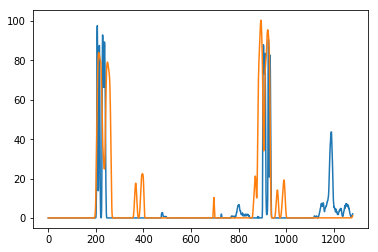

In [449]:
from stage1_util import calibrate, cal_undistort, load_camera_cal, corners_unwarp, pipeline
mtx, dist = load_camera_cal()
img_test_ex = plt.imread('test_images/signs_vehicles_xygrad.jpg')
und_img_test_ex = cal_undistort(img_test_ex, mtx, dist)
combined, colored = pipeline(und_img_test_ex)
top_down = corners_unwarp(combined, 9, 6, mtx, dist)
top_down_org = corners_unwarp(und_img_test_ex, 9, 6, mtx, dist)
histogram_d = np.sum(top_down[top_down.shape[0]//2:,:], axis=0)
plt.plot(histogram_d)
histogram_u = np.sum(top_down[0:top_down.shape[0]//2,:], axis=0)
plt.plot(histogram_u)

In [450]:
midpoint = np.int(histogram.shape[0]/2)
print(midpoint)

leftx_base_d = np.argmax(histogram_d[:midpoint])
print(leftx_base_d, histogram_d[leftx_base_d])
rightx_base_d = np.argmax(histogram_d[midpoint:]) + midpoint
print(rightx_base_d, histogram[rightx_base_d])

leftx_base_u = np.argmax(histogram_u[:midpoint])
print(leftx_base_u, histogram_u[leftx_base_u])
rightx_base_u = np.argmax(histogram[midpoint:]) + midpoint
print(rightx_base_u, histogram_u[rightx_base_u])

640
206 97.654296875
925 0.0
212 83.9775390625
1038 0.0


In [451]:
leftx_base_h = max(leftx_base_d, leftx_base_u)
leftx_base_l = min(leftx_base_d, leftx_base_u)

rightx_base_h = max(rightx_base_d, rightx_base_u)
rightx_base_l = min(rightx_base_d, rightx_base_u)

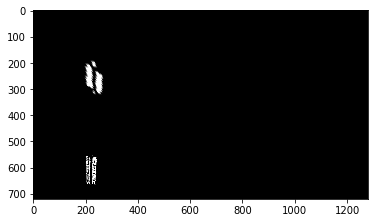

In [452]:
nonzero = top_down.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
left_ids = np.where (
    (nonzerox < leftx_base_h + 100) &
    (nonzerox > leftx_base_l - 100)
)
left_top_down = np.zeros_like (top_down)
left_top_down [(nonzeroy[left_ids], nonzerox[left_ids])] = top_down [(nonzeroy[left_ids], nonzerox[left_ids])]
plt.imshow(left_top_down,cmap='gray')

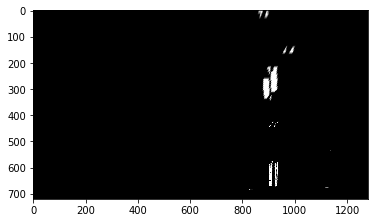

In [453]:
right_ids = np.where (
    (nonzerox < rightx_base_h + 100) &
    (nonzerox > rightx_base_l - 100)
)
right_top_down = np.zeros_like (top_down)
right_top_down [(nonzeroy[right_ids], nonzerox[right_ids])] = top_down [(nonzeroy[right_ids], nonzerox[right_ids])]
plt.imshow(right_top_down,cmap='gray')

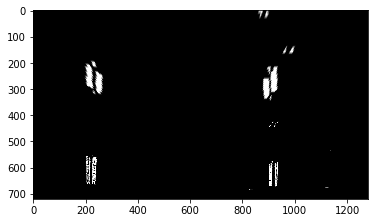

In [454]:
combined_top_down = np.add(left_top_down,right_top_down)
plt.imshow(combined_top_down,cmap='gray')

In [487]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import cv2

#Thank you, Alan Bernstein
#https://gist.github.com/alanbernstein/d34ced4786d24bdc20bc6b923ba33308
    
def quadratic_ransac_fit (X, y, residual_threshold = 60):
    """Function performs polynomial RANSAC fitting
    Args:
        X (list): list of X values
        y (list): list of corresponding y values
        residual_threshold (float): Maximum residual for a data sample to be classified as an inlier.
                                    By default the threshold is chosen as the MAD (median absolute deviation)
                                    of the target values y.
                                    see http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html
    Returns:
        polynomial coeffs (list), inlier_mask (list), outlier_mask (list)
        polynomial coeffs - coefficients a, b, c for a + b*x + c*x**2 = y
        inlier_mask - inlier mask for input lists
        outlier_mask - outlier mask
    """

    x_ = X.reshape ((-1 ,1))
    y_ = y.reshape ((-1, 1))

    xi = np.linspace (min(x_), max(x_), 100).reshape ((-1, 1))

    poly = PolynomialFeatures (degree=2)
    x_2 = poly.fit_transform (x_)
    xi_2 = poly.fit_transform (xi)

    model = linear_model.RANSACRegressor (linear_model.LinearRegression (), residual_threshold = residual_threshold)
    try:
        model.fit (x_2, y_)
    # ValueError: No inliers found, possible cause is setting residual_threshold (None) too low
    except ValueError:
        return None, None, None
    
    yi = model.predict (xi_2)
    c = model.estimator_.coef_
    yi_b = np.dot (c, xi_2.T).T

    c_b = np.array ([float(yi[3][0] - yi_b[0]), c[0, 1], c[0, 2]])
    yi_b = np.dot (c_b, xi_2.T).T

    inlier_mask = model.inlier_mask_
    outlier_mask = np.logical_not (inlier_mask)
    
    return c_b, inlier_mask, outlier_mask

In [472]:
#x, y = np.where (left_top_down > 0)
left_nonzero = left_top_down.nonzero()
left_nonzeroy = np.array(left_nonzero[0])
left_nonzerox = np.array(left_nonzero[1])
coeffs, inlier_mask, outlier_mask = quadratic_ransac_fit (X=left_nonzeroy, y=left_nonzerox)
left_coeffs = coeffs

In [473]:
right_nonzero = right_top_down.nonzero()
right_nonzeroy = np.array(right_nonzero[0])
right_nonzerox = np.array(right_nonzero[1])
coeffs, inlier_mask, outlier_mask = quadratic_ransac_fit (X=right_nonzeroy, y=right_nonzerox)
right_coeffs = coeffs

In [474]:
print(right_coeffs)

[  9.30027393e+02  -9.24619557e-02   1.01795940e-04]


In [475]:
def getXYQuadratic (coeffs, limits):
    """Calcs polynomial points from cefficients
    """
    x = np.linspace (limits[0], limits[1], 100)
    y = np.add(np.add(coeffs [0], coeffs [1] * x), coeffs [2] * x * x)
    return x, y

def get_lane_lines_field (img,coeff1, coeff2):
    """Draws lane and lane lines by coeffs
    """
    zero_layer = np.zeros_like (img).astype (np.uint8)
    
    if (coeff1 == None or coeff2 == None):
        return np.dstack ((zero_layer, zero_layer, zero_layer))

    # from tips and tricks from lesson
    left_x, left_y = getXYQuadratic (coeff1, (0, 1280))
    right_x, right_y = getXYQuadratic (coeff2, (0, 1280))
    pts_left = np.array ([np.transpose(np.vstack([left_y, left_x]))])
    pts_right = np.array ([np.flipud(np.transpose(np.vstack([right_y, right_x])))])
    pts = np.hstack ((pts_left, pts_right))

    lanes_drown = np.dstack ((zero_layer, zero_layer, zero_layer))
    lanes_drown = cv2.fillPoly (lanes_drown, np.int_([pts]), (0, 255, 0))
    
    lanes_drown = draw_lane_line_top_view (lanes_drown, coeff1)
    lanes_drown = draw_lane_line_top_view (lanes_drown, coeff2)
    
    return lanes_drown

def draw_lane_line_top_view (img, coeffs):
    """Draw one lane line
    """
    x, y = getXYQuadratic (coeffs, (0, 1280))
    pts = np.array ([np.transpose(np.vstack([y, x]))]).astype(np.int)
    return cv2.polylines(img, [pts], False, (255, 0, 0), 20)

C:\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


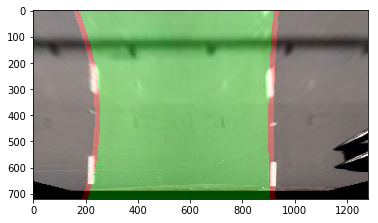

In [476]:
lane_lines_field = get_lane_lines_field (combined_top_down, left_coeffs, right_coeffs)
plt.imshow(lane_lines_field)
result = cv2.addWeighted (top_down_org, 1, lane_lines_field, 0.3, 0)
plt.imshow(result)

640
206 97.654296875
925 90.64453125
80


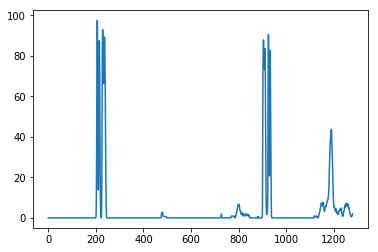

In [479]:
histogram = np.sum(top_down[top_down.shape[0]//2:,:], axis=0)
plt.plot(histogram)
midpoint = np.int(histogram.shape[0]/2)
print(midpoint)
leftx_base = np.argmax(histogram[:midpoint])
print(leftx_base, histogram[leftx_base])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint
print(rightx_base, histogram[rightx_base])
print(np.int(top_down.shape[0]/9))

In [480]:
nwindows = 8
# Set height of windows
window_height = np.int(top_down.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = top_down.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 40
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

In [481]:
# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = top_down.shape[0] - (window+1)*window_height
    win_y_high = top_down.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    #print(win_xleft_low,win_y_low, win_xleft_high, win_y_high)
    #print(win_xright_low,win_y_low, win_xright_high, win_y_high)
    # Draw the windows on the visualization image
    #cv2.rectangle(out_img1,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    #cv2.rectangle(out_img1,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

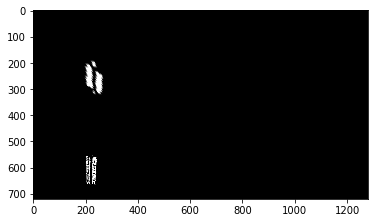

In [482]:
left_lane_inds = np.concatenate(left_lane_inds)
left_top_down = np.zeros_like (top_down)
left_top_down [(nonzeroy[left_lane_inds], nonzerox[left_lane_inds])] = top_down [(nonzeroy[left_lane_inds], nonzerox[left_lane_inds])]
plt.imshow(left_top_down,cmap='gray')

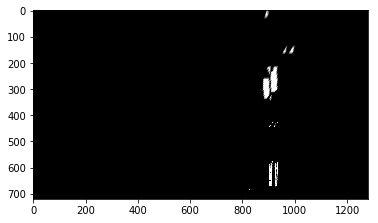

In [483]:
right_lane_inds = np.concatenate(right_lane_inds)
right_top_down = np.zeros_like (top_down)
right_top_down [(nonzeroy[right_lane_inds], nonzerox[right_lane_inds])] = top_down [(nonzeroy[right_lane_inds], nonzerox[right_lane_inds])]
plt.imshow(right_top_down,cmap='gray')

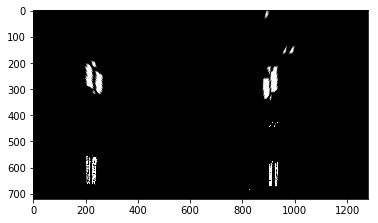

In [484]:
combined_top_down = np.add(left_top_down,right_top_down)
plt.imshow(combined_top_down,cmap='gray')

In [485]:
#x, y = np.where (left_top_down > 0)
left_nonzero = left_top_down.nonzero()
left_nonzeroy = np.array(left_nonzero[0])
left_nonzerox = np.array(left_nonzero[1])
coeffs, inlier_mask, outlier_mask = quadratic_ransac_fit (X=left_nonzeroy, y=left_nonzerox)
left_coeffs = coeffs

right_nonzero = right_top_down.nonzero()
right_nonzeroy = np.array(right_nonzero[0])
right_nonzerox = np.array(right_nonzero[1])
coeffs, inlier_mask, outlier_mask = quadratic_ransac_fit (X=right_nonzeroy, y=right_nonzerox)
right_coeffs = coeffs

C:\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


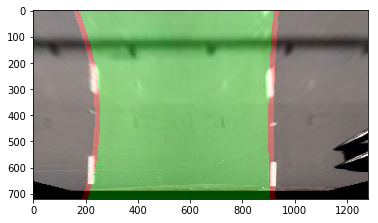

In [486]:
lane_lines_field = get_lane_lines_field (combined_top_down, left_coeffs, right_coeffs)
plt.imshow(lane_lines_field)
result = cv2.addWeighted (top_down_org, 1, lane_lines_field, 0.3, 0)
plt.imshow(result)

In [469]:
# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

(720, 0)

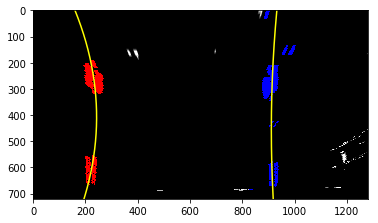

In [470]:
out_img1 = np.uint8(np.dstack((top_down, top_down, top_down))*255)
# Generate x and y values for plotting
ploty = np.linspace(0, top_down.shape[0]-1, top_down.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img1[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img1[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img1)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)